In [15]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as pl
import seaborn as sns
pl.style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
import missingno as msno

In [2]:
import pandas as pd

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
train.shape,test.shape

((10886, 12), (6493, 9))

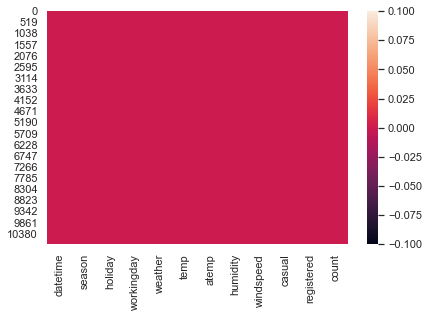

In [12]:
sns.heatmap(train.isnull())

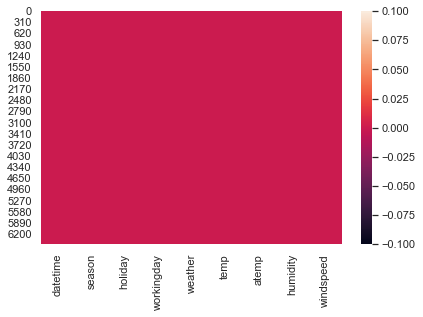

In [13]:
sns.heatmap(test.isnull())

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# missingno is library to check for missing vlaues

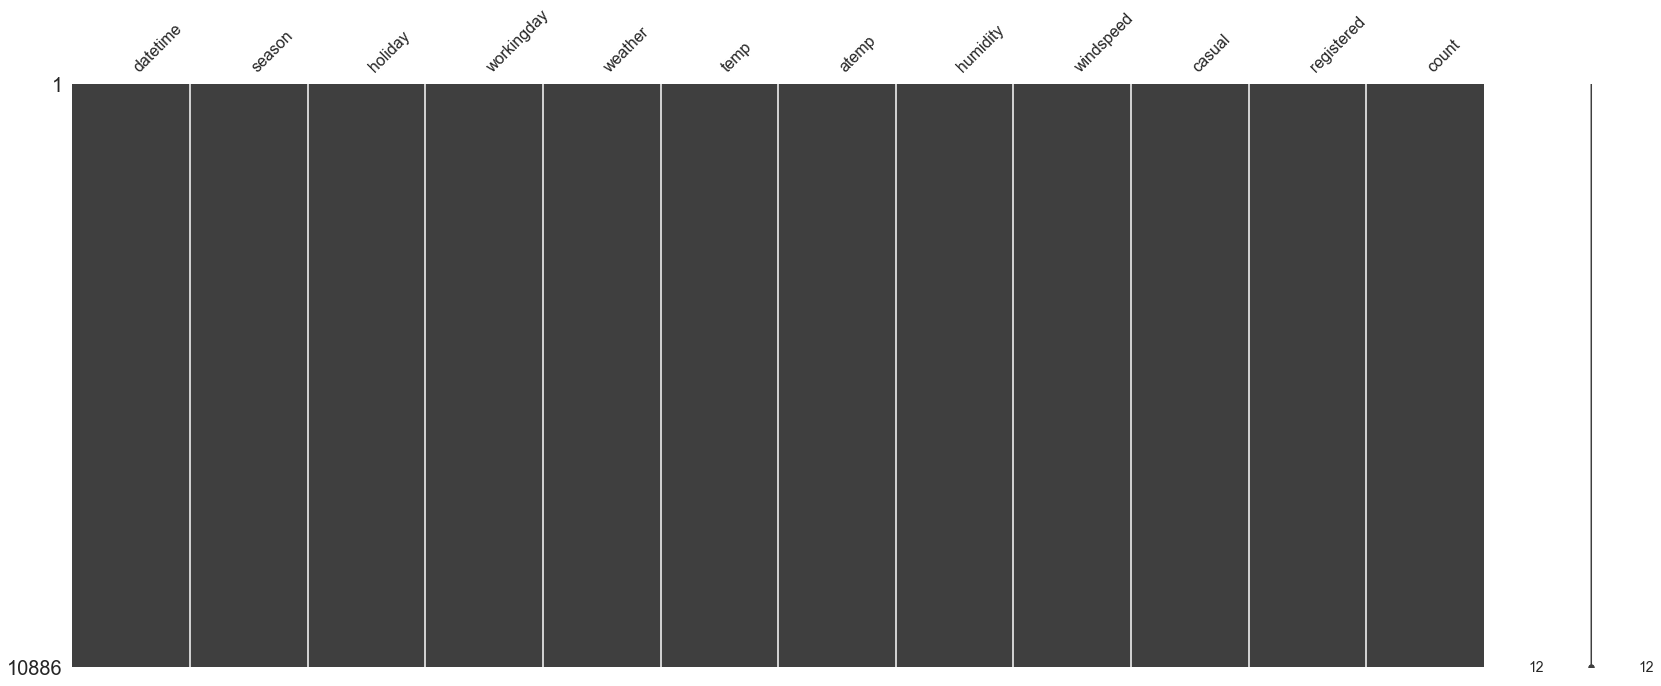

In [17]:
msno.matrix(train)

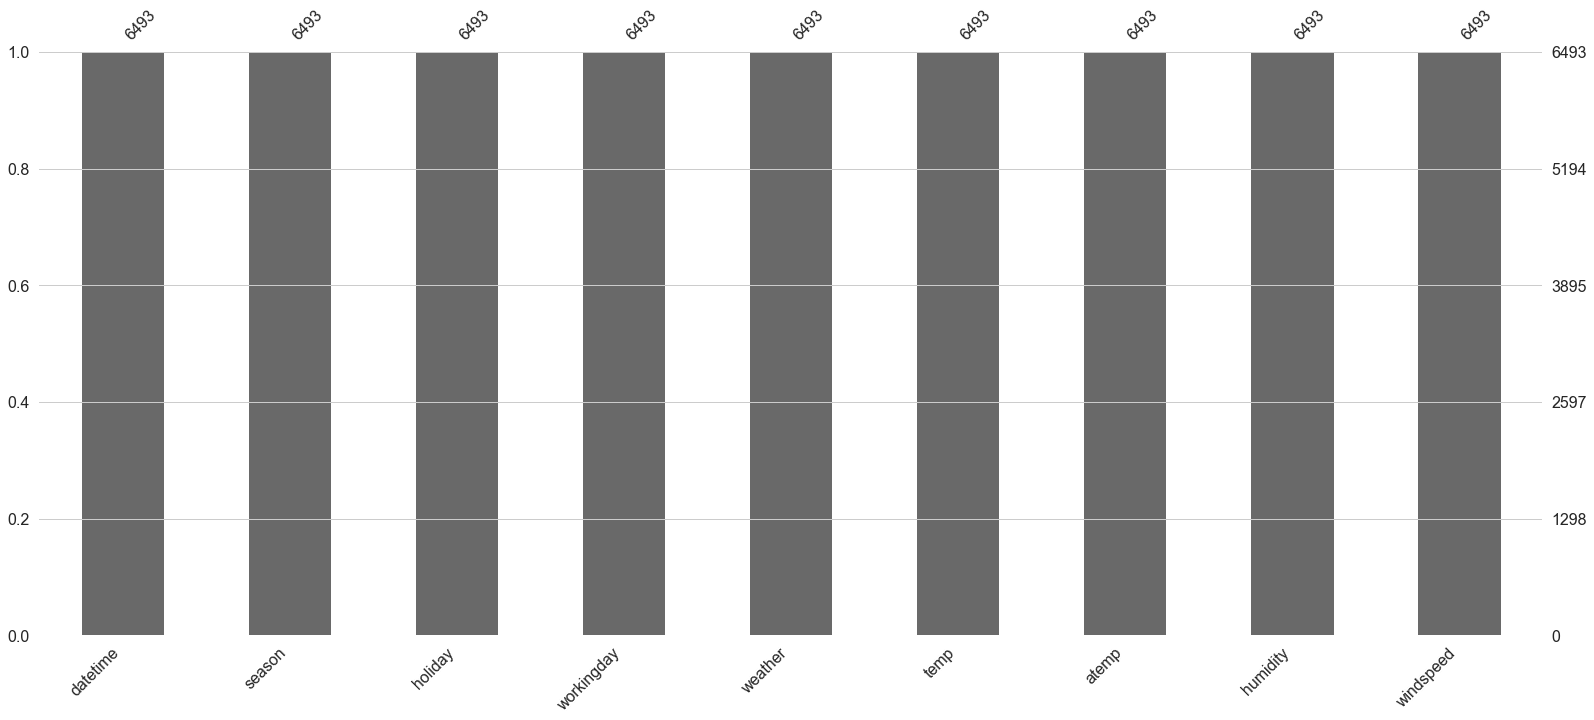

In [18]:
msno.bar(test)

In [20]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

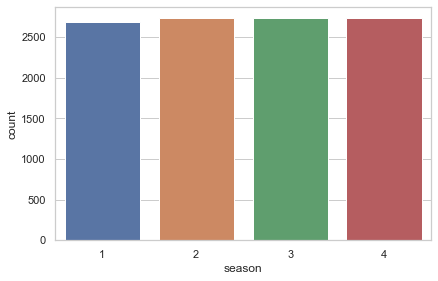

In [21]:
sns.countplot(train['season'])

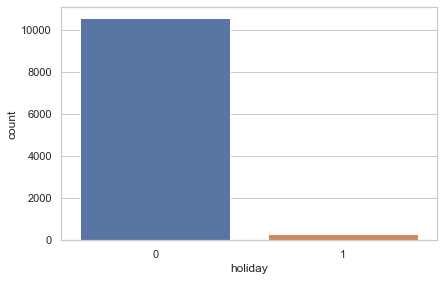

In [22]:
sns.countplot(train['holiday'])

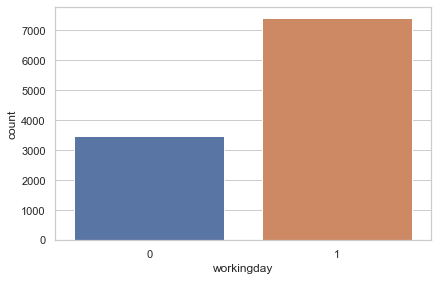

In [23]:
sns.countplot(train['workingday'])

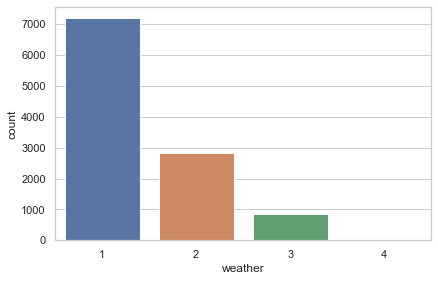

In [24]:
sns.countplot(train['weather'])

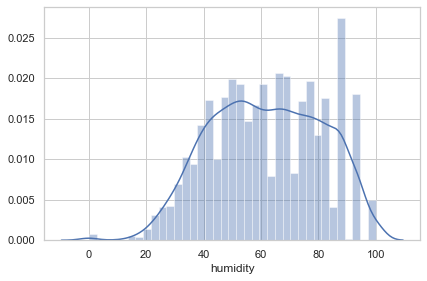

In [25]:
sns.distplot(train['humidity'])

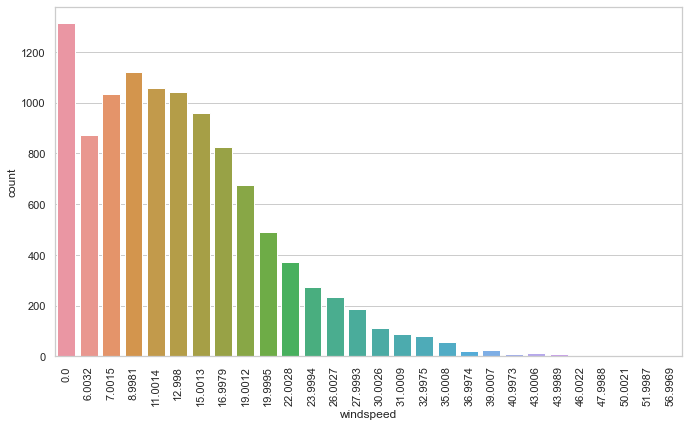

In [33]:
pl.figure(figsize=(10,6))
sns.countplot(train['windspeed'])
pl.xticks(rotation=90)
pl.show()

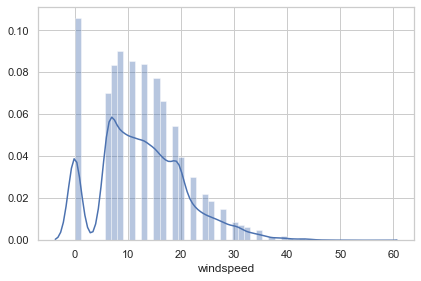

In [34]:
sns.distplot(train['windspeed'])

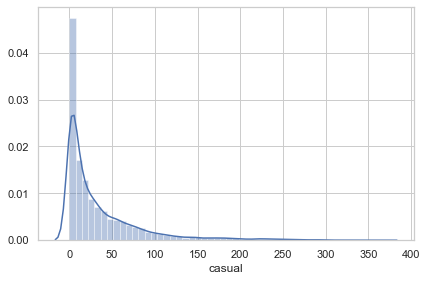

In [28]:
sns.distplot(train['casual'])

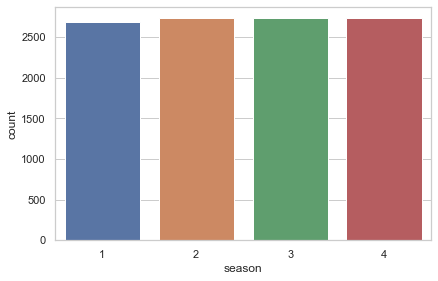

In [35]:
sns.countplot(train['season'])

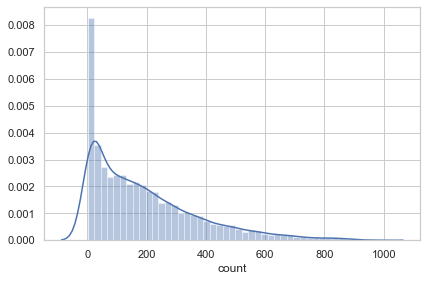

In [37]:
sns.distplot(train['count'])

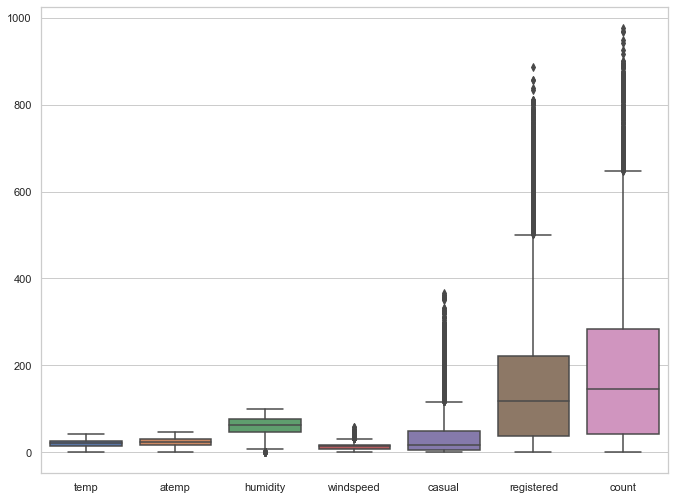

In [50]:
pl.figure(figsize=(10,8))
sns.boxplot(data=train[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=pl.gcf()
# fig.set_size_inches(10,8)